# Load the data

In [79]:
import pandas as pd
import geopandas as gpd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import numpy as np
gdf = gpd.read_file('/content/traffic_gdf_6month.gpkg')



# Data Preprocessing

In [51]:

gdf['time_series'] = pd.to_datetime(gdf['time_series'])


sampled_gdf = gdf[
    (gdf['time_series'].dt.month.between(1, 6)) &  
    (gdf['time_series'].dt.year == 2023)
]

gdf = sampled_gdf

In [71]:
gdf

,hour,day,month,centroid_x,centroid_y,traffic_status_encoded,traffic_id,traffic_status,cluster
499323,10,3,4,46.681508,24.676263,0,499323,Heavy,1
819338,17,1,6,46.830927,24.757182,0,819338,Heavy,3
628699,11,0,5,46.678170,24.675632,0,628699,Heavy,1
270180,13,1,2,46.768357,24.704456,0,270180,Heavy,3
643342,18,2,5,46.838346,24.762418,0,643342,Heavy,0
...,...,...,...,...,...,...,...,...,...
823141,12,2,6,46.864974,24.796017,2,823141,Moderate,4
111190,9,6,1,46.738063,24.699718,2,111190,Moderate,2
289850,19,5,2,46.831000,24.757905,2,289850,Moderate,0
473516,22,5,4,46.676647,24.675509,2,473516,Moderate,0


In [53]:
import pandas as pd
import geopandas as gpd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import numpy as np
gdf['time_series'] = pd.to_datetime(gdf['time_series'])
gdf['hour'] = gdf['time_series'].dt.hour
gdf['day'] = gdf['time_series'].dt.dayofweek 
gdf['month'] = gdf['time_series'].dt.month

gdf['centroid_x'] = gdf.geometry.centroid.x
gdf['centroid_y'] = gdf.geometry.centroid.y

label_encoder = LabelEncoder()
gdf['traffic_status_encoded'] = label_encoder.fit_transform(gdf['traffic_status'])

features = gdf[['hour', 'day', 'month', 'centroid_x', 'centroid_y']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)



<ipython-input-53-dea6e5495858>:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_x'] = gdf.geometry.centroid.x
<ipython-input-53-dea6e5495858>:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_y'] = gdf.geometry.centroid.y


In [54]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler


rus = RandomUnderSampler(random_state=42)

X = gdf[['hour', 'day', 'month', 'centroid_x', 'centroid_y', 'traffic_status_encoded', 'traffic_id']]  # Features for clustering
y = gdf['traffic_status']  

X_resampled, y_resampled = rus.fit_resample(X, y)


balanced_gdf = pd.DataFrame(X_resampled, columns=X.columns)
balanced_gdf['traffic_status'] = y_resampled

rus = RandomUnderSampler(random_state=42)


X_resampled, y_resampled = rus.fit_resample(X, y) 


balanced_gdf = pd.DataFrame(X_resampled, columns=X.columns)
balanced_gdf['traffic_status'] = y_resampled

In [55]:
balanced_gdf['traffic_status'].value_counts()

,count
traffic_status,
Heavy,78137
Light,78137
Moderate,78137


In [56]:
balanced_gdf['traffic_status'].value_counts()

,count
traffic_status,
Heavy,78137
Light,78137
Moderate,78137


In [57]:
gdf= balanced_gdf
gdf

,hour,day,month,centroid_x,centroid_y,traffic_status_encoded,traffic_id,traffic_status
499323,10,3,4,46.681508,24.676263,0,499323,Heavy
819338,17,1,6,46.830927,24.757182,0,819338,Heavy
628699,11,0,5,46.678170,24.675632,0,628699,Heavy
270180,13,1,2,46.768357,24.704456,0,270180,Heavy
643342,18,2,5,46.838346,24.762418,0,643342,Heavy
...,...,...,...,...,...,...,...,...
823141,12,2,6,46.864974,24.796017,2,823141,Moderate
111190,9,6,1,46.738063,24.699718,2,111190,Moderate
289850,19,5,2,46.831000,24.757905,2,289850,Moderate
473516,22,5,4,46.676647,24.675509,2,473516,Moderate


In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
gdf['traffic_status_encoded'] = label_encoder.fit_transform(gdf['traffic_status'])

features = gdf[['hour', 'day', 'month', 'traffic_status_encoded', 'centroid_x', 'centroid_y']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

n_clusters = 3  
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
gdf['cluster'] = kmeans.fit_predict(features_scaled)
print("Cluster centers (in scaled space):")
print(kmeans.cluster_centers_)
original_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster centers (in original space):")
print(original_centers)


Cluster centers (in scaled space):
[[ 6.14023604e-01  8.34296363e-01 -1.70995689e-04  1.33724514e-01
  -2.94619926e-01 -3.47532056e-01]
 [-5.95585337e-01 -7.93054795e-01 -2.48727713e-03 -1.01073656e-01
  -3.26327407e-01 -3.72510433e-01]
 [ 5.97526793e-02  4.01387328e-02  6.71082881e-03 -5.95963412e-02
   1.52341080e+00  1.76550499e+00]]
Cluster centers (in original space):
[[17.66147242  4.49225657  3.50865944  1.10918561 46.76059186 24.71618174]
 [11.15100218  1.35200437  3.50469339  0.91747371 46.7582341  24.71483588]
 [14.67822368  2.95979368  3.52044282  0.95133979 46.89577975 24.83003444]]


In [59]:
gdf

,hour,day,month,centroid_x,centroid_y,traffic_status_encoded,traffic_id,traffic_status,cluster
499323,10,3,4,46.681508,24.676263,0,499323,Heavy,1
819338,17,1,6,46.830927,24.757182,0,819338,Heavy,1
628699,11,0,5,46.678170,24.675632,0,628699,Heavy,1
270180,13,1,2,46.768357,24.704456,0,270180,Heavy,1
643342,18,2,5,46.838346,24.762418,0,643342,Heavy,2
...,...,...,...,...,...,...,...,...,...
823141,12,2,6,46.864974,24.796017,2,823141,Moderate,2
111190,9,6,1,46.738063,24.699718,2,111190,Moderate,0
289850,19,5,2,46.831000,24.757905,2,289850,Moderate,0
473516,22,5,4,46.676647,24.675509,2,473516,Moderate,0


## Evaluation

In [60]:
print(gdf[['hour', 'day', 'month', 'traffic_status', 'traffic_status_encoded', 'centroid_x', 'centroid_y', 'cluster']].head())

        hour  day  month traffic_status  traffic_status_encoded  centroid_x  \
499323    10    3      4          Heavy                       0   46.681508   
819338    17    1      6          Heavy                       0   46.830927   
628699    11    0      5          Heavy                       0   46.678170   
270180    13    1      2          Heavy                       0   46.768357   
643342    18    2      5          Heavy                       0   46.838346   

        centroid_y  cluster  
499323   24.676263        1  
819338   24.757182        1  
628699   24.675632        1  
270180   24.704456        1  
643342   24.762418        2  


In [61]:
cluster_summary = gdf.groupby(['traffic_status_encoded', 'cluster']).size().reset_index(name='count')
print(cluster_summary)

   traffic_status_encoded  cluster  count
0                       0        0  20696
1                       0        1  43381
2                       0        2  14060
3                       1        0  42312
4                       1        1  22222
5                       1        2  13603
6                       2        0  31083
7                       2        1  34920
8                       2        2  12134


## Visualize Clusters

In [62]:
pip install matplotlib seaborn

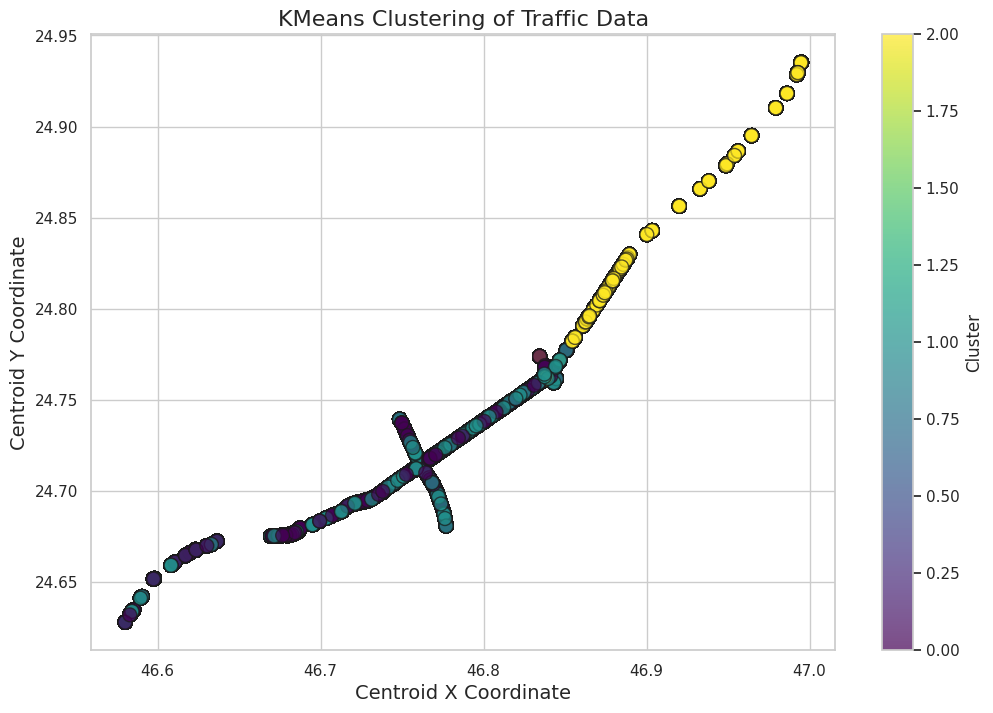

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    gdf['centroid_x'],
    gdf['centroid_y'],
    c=gdf['cluster'],
    cmap='viridis',  
    alpha=0.7,
    edgecolor='k',
    s=100  
)


plt.colorbar(scatter, label='Cluster')


plt.title('KMeans Clustering of Traffic Data', fontsize=16)
plt.xlabel('Centroid X Coordinate', fontsize=14)
plt.ylabel('Centroid Y Coordinate', fontsize=14)


plt.show()


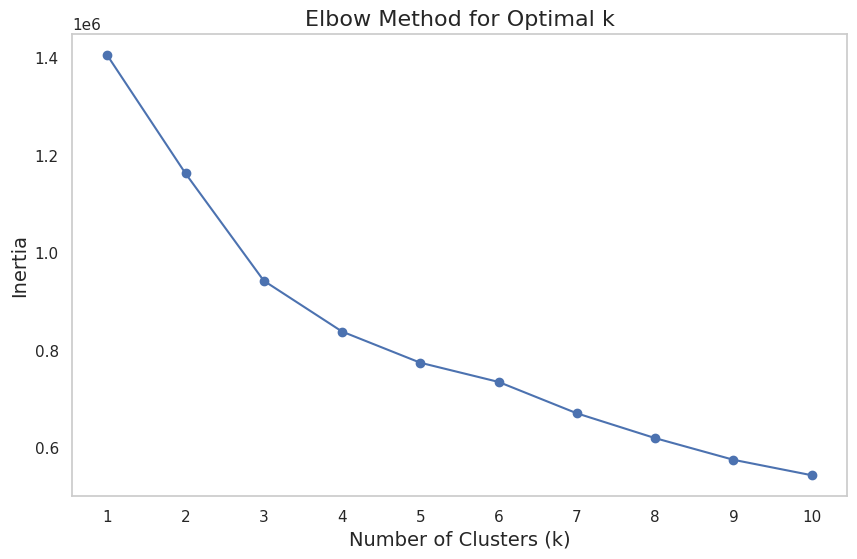

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

cluster_range = range(1, 11)
inertia = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(features_scaled)  
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.xticks(cluster_range)
plt.grid()
plt.show()


In [64]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
gdf['traffic_status_encoded'] = label_encoder.fit_transform(gdf['traffic_status'])


features = gdf[['hour', 'day', 'month', 'centroid_x', 'centroid_y']]


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

n_clusters = 3 
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
gdf['cluster'] = kmeans.fit_predict(features_scaled)

def predict_traffic_status(hour, day, month, centroid_x, centroid_y):
 
    new_data = pd.DataFrame({
        'hour': [hour],
        'day': [day],
        'month': [month],
        'centroid_x': [centroid_x],
        'centroid_y': [centroid_y]
    })

  
    new_data_scaled = scaler.transform(new_data)

    cluster = kmeans.predict(new_data_scaled)[0]

  
    most_common_status = gdf[gdf['cluster'] == cluster]['traffic_status'].mode()[0]

    return most_common_status

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
gdf['traffic_status_encoded'] = label_encoder.fit_transform(gdf['traffic_status'])

features = gdf[['hour', 'day', 'month', 'centroid_x', 'centroid_y']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
n_clusters = 5  
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
gdf['cluster'] = kmeans.fit_predict(features_scaled)

def predict_traffic_status(hour, day, month, centroid_x, centroid_y):
 
    new_data = pd.DataFrame({
        'hour': [hour],
        'day': [day],
        'month': [month],
        'centroid_x': [centroid_x],
        'centroid_y': [centroid_y]
    })

 
    new_data_scaled = scaler.transform(new_data)

    cluster = kmeans.predict(new_data_scaled)[0]


    most_common_status = gdf[gdf['cluster'] == cluster]['traffic_status'].mode()[0]

    return most_common_status


predicted_status = predict_traffic_status(hour=18, day=5, month=3, centroid_x=46.783493, centroid_y=24.727720)
print(f'The predicted traffic status is: {predicted_status}')



The predicted traffic status is: Light


# Random forest (supervised learning)

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


X = gdf[['hour', 'day', 'month', 'centroid_x', 'centroid_y']]
y = gdf['traffic_status_encoded']


from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_pred = rf_model.predict(X_test_scaled)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

       Heavy       0.61      0.69      0.65     15436
       Light       0.74      0.80      0.77     15675
    Moderate       0.37      0.29      0.33     15772

    accuracy                           0.59     46883
   macro avg       0.57      0.60      0.58     46883
weighted avg       0.57      0.59      0.58     46883



In [66]:
from sklearn.metrics import accuracy_score

y_train_pred = rf_model.predict(X_train_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')

y_test_pred = rf_model.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.2f}')


Training Accuracy: 0.89
Test Accuracy: 0.59


In [67]:
import pandas as pd

def predict_traffic_status(hour, day, month, centroid_x, centroid_y):
   
    new_data = pd.DataFrame({
        'hour': [hour],
        'day': [day],
        'month': [month],
        'centroid_x': [centroid_x],
        'centroid_y': [centroid_y]
    })


    new_data_scaled = scaler.transform(new_data)

    predicted_encoded_status = rf_model.predict(new_data_scaled)[0]

    predicted_status = label_encoder.inverse_transform([predicted_encoded_status])[0]

    return predicted_status

predicted_status = predict_traffic_status(hour=20, day=21, month=1, centroid_x=46.783493, centroid_y=24.727720)
print(f'The predicted traffic status is: {predicted_status}')


The predicted traffic status is: Moderate


In [27]:
pip install tqdm

In [68]:
new_gdf

,hour,day,month,centroid_x,centroid_y,traffic_status_encoded,traffic_id,traffic_status,predicted_traffic_status
18896,9,2,7,46.850755,24.777227,0,18896,Heavy,None
148462,11,6,7,46.878500,24.814419,0,148462,Heavy,None
45897,14,0,7,46.769228,24.703201,0,45897,Heavy,None
114477,17,6,7,46.816382,24.748136,0,114477,Heavy,None
162597,17,1,7,46.782181,24.727475,0,162597,Heavy,None
...,...,...,...,...,...,...,...,...,...
159484,10,1,7,46.776156,24.723720,2,159484,Moderate,None
44538,11,0,7,46.671495,24.675246,2,44538,Moderate,None
46514,15,0,7,46.756577,24.723802,2,46514,Moderate,None
26646,13,3,7,46.874363,24.808755,2,26646,Moderate,None


In [69]:
from tqdm import tqdm
import pandas as pd

new_gdf.loc[:, 'predicted_traffic_status'] = None  
for index, row in tqdm(new_gdf.iterrows(), total=new_gdf.shape[0], desc="Predicting Traffic Status"):
   
    predicted_status = predict_traffic_status(
        hour=row['hour'],
        day=row['day'],
        month=row['month'],
        centroid_x=row['centroid_x'],
        centroid_y=row['centroid_y']  
    )

    
    new_gdf.at[index, 'predicted_traffic_status'] = predicted_status
print(new_gdf.head())


Predicting Traffic Status: 100%|██████████| 40306/40306 [05:36<00:00, 119.90it/s]

        hour  day  month  centroid_x  centroid_y  traffic_status_encoded  \
18896      9    2      7   46.850755   24.777227                       0   
148462    11    6      7   46.878500   24.814419                       0   
45897     14    0      7   46.769228   24.703201                       0   
114477    17    6      7   46.816382   24.748136                       0   
162597    17    1      7   46.782181   24.727475                       0   

        traffic_id traffic_status predicted_traffic_status  
18896        18896          Heavy                 Moderate  
148462      148462          Heavy                    Heavy  
45897        45897          Heavy                 Moderate  
114477      114477          Heavy                 Moderate  
162597      162597          Heavy                 Moderate  


In [70]:
new_gdf

,hour,day,month,centroid_x,centroid_y,traffic_status_encoded,traffic_id,traffic_status,predicted_traffic_status
18896,9,2,7,46.850755,24.777227,0,18896,Heavy,Moderate
148462,11,6,7,46.878500,24.814419,0,148462,Heavy,Heavy
45897,14,0,7,46.769228,24.703201,0,45897,Heavy,Moderate
114477,17,6,7,46.816382,24.748136,0,114477,Heavy,Moderate
162597,17,1,7,46.782181,24.727475,0,162597,Heavy,Moderate
...,...,...,...,...,...,...,...,...,...
159484,10,1,7,46.776156,24.723720,2,159484,Moderate,Heavy
44538,11,0,7,46.671495,24.675246,2,44538,Moderate,Moderate
46514,15,0,7,46.756577,24.723802,2,46514,Moderate,Heavy
26646,13,3,7,46.874363,24.808755,2,26646,Moderate,Heavy


In [75]:
new_gdf = pd.merge(new_gdf, geometry_gdf[['traffic_id', 'geometry']], on='traffic_id', how='left')

In [77]:
new_gdf = new_gdf.sort_values(by='traffic_id')
new_gdf = new_gdf.reset_index(drop=True)

In [82]:
new_gdf['traffic_id'] = range(946070, 946070 + len(new_gdf))

In [83]:
new_gdf

,hour,day,month,centroid_x,centroid_y,traffic_status_encoded,traffic_id,traffic_status,predicted_traffic_status,geometry
0,6,6,7,46.608165,24.659111,2,946070,Moderate,Light,"LINESTRING (46.60117 24.65468, 46.60181 24.655..."
1,6,6,7,46.583564,24.632317,1,946071,Light,Moderate,"LINESTRING (46.58231 24.6305, 46.58402 24.633,..."
2,6,6,7,46.730854,24.695419,1,946072,Light,Light,"LINESTRING (46.73111 24.69575, 46.73092 24.695..."
3,6,6,7,46.715542,24.690551,1,946073,Light,Moderate,"LINESTRING (46.71485 24.68975, 46.71567 24.690..."
4,6,6,7,46.716714,24.691573,2,946074,Moderate,Light,"LINESTRING (46.71629 24.6913, 46.71695 24.6917..."
...,...,...,...,...,...,...,...,...,...,...
40301,18,1,7,46.712708,24.688571,1,986371,Light,Moderate,"LINESTRING (46.71452 24.68988, 46.714 24.68931..."
40302,18,1,7,46.716505,24.691543,1,986372,Light,Light,"LINESTRING (46.71884 24.69265, 46.71823 24.692..."
40303,18,1,7,46.727806,24.694819,2,986373,Moderate,Moderate,"LINESTRING (46.73622 24.69834, 46.73427 24.697..."
40304,18,1,7,46.737596,24.699064,1,986374,Light,Moderate,"LINESTRING (46.73521 24.69747, 46.73747 24.698..."


# Save the data

In [85]:
!pip install geopandas
import geopandas as gpd
import pandas as pd

new_gdf = gpd.GeoDataFrame(new_gdf, geometry='geometry')
new_gdf.to_csv('predicted_traffic_status.csv', index=False)
new_gdf.to_file('predicted_traffic_status.geojson', driver='GeoJSON')
new_gdf.to_file('predicted_traffic_status.gpkg', driver='GPKG')

In [88]:
import joblib

model_filename = "traffic_prediction_model.kpl"
joblib.dump({"model": rf_model, "scaler": scaler, "encoder": label_encoder}, model_filename)
print(f"Model saved to {model_filename}")

Model saved to traffic_prediction_model.kpl


# confusion matrix

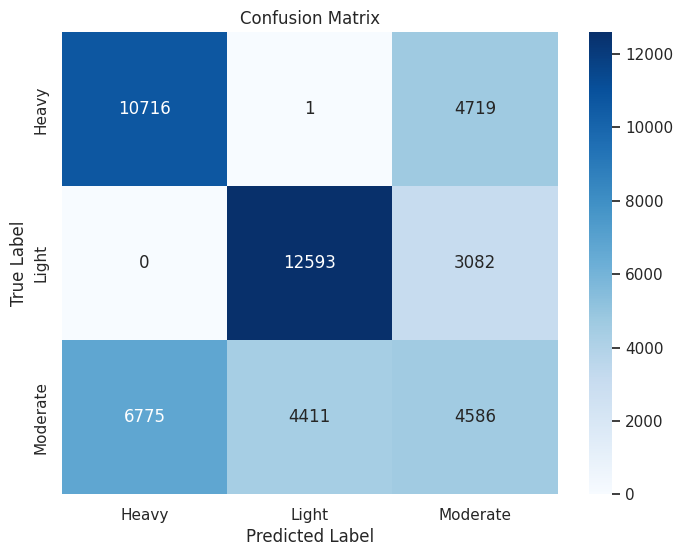

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
